In [4]:
from src.model import get_Xy, process_Xy, GCN

ImportError: cannot import name 'get_Xy' from 'src.model' (/home/tox/GCNembedding/src/model.py)

In [2]:
import numpy as np

In [3]:
X,y = get_Xy(0.44,'andro',True)

andro Label
0    1247
1     170
Name: count, dtype: int64


In [4]:
X.shape

(1417, 1417)

In [5]:
train_idx=np.arange(1200)
test_idx=np.arange(1200,1417)

In [6]:
train_idx

array([   0,    1,    2, ..., 1197, 1198, 1199], shape=(1200,))

In [8]:
data_train = process_Xy(X[train_idx][:,train_idx],y.values[train_idx], 0.44, binarizeEdge=True)

In [10]:
model = GCN(inputDim=train_idx.size)

In [11]:
losses = model.trainModel(data_train, 1000)

Epochs: 100%|██████████| 1000/1000 [00:03<00:00, 272.51it/s]


In [25]:
data_train.edge_index.dtype

torch.int64

In [13]:
import torch

In [35]:
data_train.edge_index

tensor([[   0,    0,    0,  ..., 1199, 1199, 1199],
        [  17,  152,  156,  ...,   94,  182,  563]])

In [16]:
X_test = X[test_idx][:,train_idx]

In [39]:
X_test.shape

(217, 1200)

In [2]:
edge_index_test = torch.Tensor(np.argwhere(X_test.T>0).T).to(torch.sparse)

NameError: name 'torch' is not defined

In [1]:
edge_index_test

NameError: name 'edge_index_test' is not defined

In [38]:
_,h=model(torch.Tensor(X_test).float(), edge_index_test)

IndexError: index 826 is out of bounds for dimension 0 with size 217

In [22]:
h.shape

torch.Size([1200, 2])

In [1]:
import glob

In [2]:
glob.glob('dataset/endpoint=*')

['dataset/endpoint=devtox.csv']

In [2]:
%pip install matplotlib

  Using cached contourpy-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 7.8 MB/s eta 0:00:0000:0100:01
Using cached contourpy-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (326 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 5.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


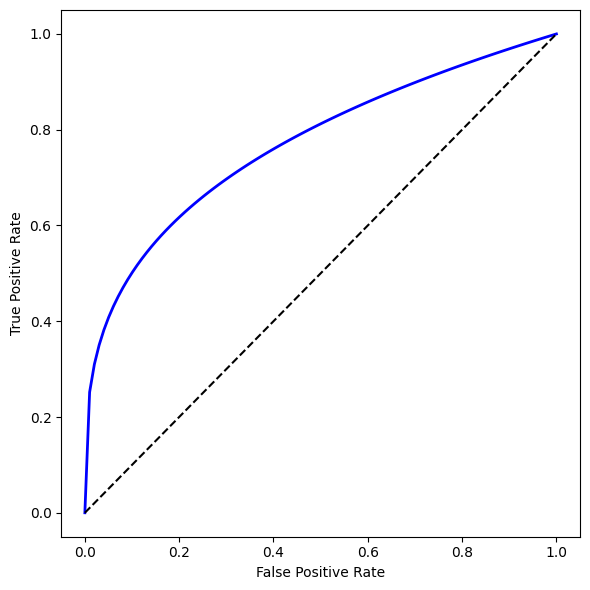

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Data for ROC curve
false_positive_rate = np.linspace(0, 1, 100)
true_positive_rate = false_positive_rate**0.3  # Example ROC curve (arbitrary shape)

# Create the plot
plt.figure(figsize=(6, 6))
plt.plot(false_positive_rate, true_positive_rate, label="ROC Curve", color="blue", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="No-discrimination line")
# plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# plt.grid(alpha=0.3)
# plt.legend()
plt.tight_layout()

# Save and display the plot
plt.savefig("roc_curve_2d.png")
plt.show()
